# Project: TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

##### An exploratory analysis of TMDb movies dataset
The dataset contains information about 10,000 movies obtaned from The Movie Database (TMDb). The dataset provides information about popularity, rating, budget, revenue casts and genres of movies released between 1960-2015.

##### This analysis is aimed as answering the following questions:
- What is the trend of movie release over time?
- What is the most popular movie of all time?
- What is the correlation between vote count and popularity?
- What is the correlation between popularity and revenue?
- What is the correlation between movie length and popularity?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.shape

(10866, 21)

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
# Check for the number of duplicated columns

df.duplicated().sum()

1

### Data Cleaning (Replace this with more specific notes!)

#### 1. Drop Duplicates

In [9]:
# Dropping the duplicated column

df.drop_duplicates(inplace = True)
df.shape

(10865, 21)

#### 2. Drop Irrelevant Columns

In [10]:
# Dropping columns that are not needed for analysis

df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 
         'production_companies', 'budget_adj', 'revenue_adj'], inplace=True, axis=1)
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


#### 3. Drop  missing values

In [11]:
# Check the number of missing values
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

####  Since the number of missing values are not much, we can drop them

In [12]:
df.dropna(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### 1. What is trend of movie release over time?

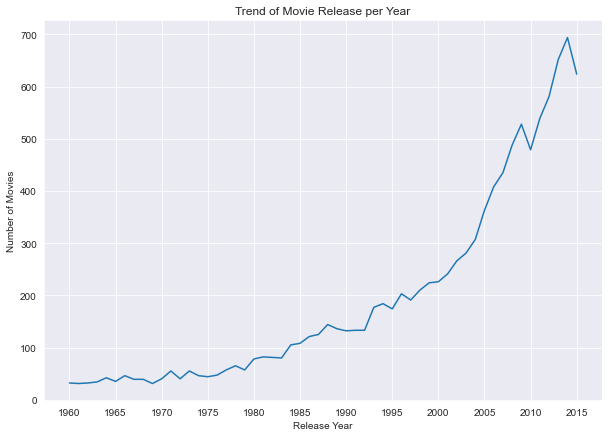

In [13]:
# Plotting the number of movies released per year using a line plot to show the trend

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
df.groupby('release_year').id.count().plot(xticks = np.arange(1960,2016,5), kind='line')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Movies')
ax.set_title('Trend of Movie Release per Year');

From the chart above, it can be seen that the year with the highest movie release is __2014__

### 2. What is the most popular movie of all time?

In [14]:
df.query('popularity == popularity.max()')

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


The most popular movie of all time is __Jurassic World__ released in 2015.

### 3. What is the correlation between vote count and popularity?

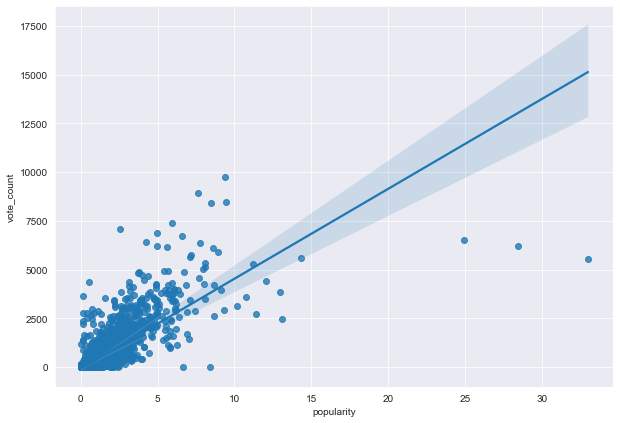

In [16]:
# defining a funtion for the plot that will be used for analysis
def scatter_chart(arg):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    sns.regplot(data=df, x='popularity', y=arg, ax=ax);
    
scatter_chart('vote_count')

### 4. What is the correlation between popularity and revenue?

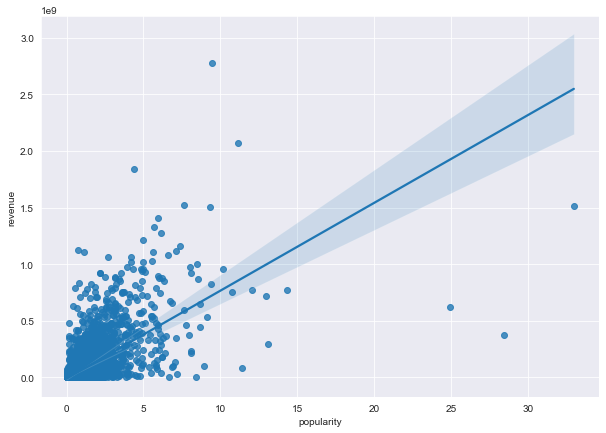

In [17]:
scatter_chart('revenue')

It can be seen that revenue is positively correlated with popularity as movies which are more popular tends to generate more revenue

### 5. What is the correlation between movie runtime and popularity?

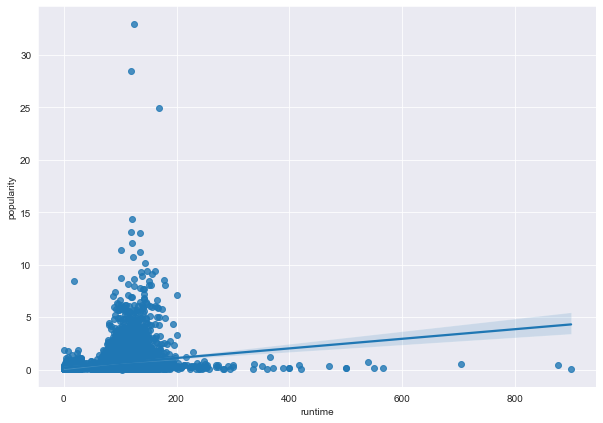

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.regplot(data=df, x='runtime', y='popularity', ax=ax);

### 6. What is the distribution of average votes?

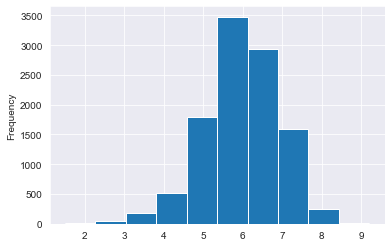

In [20]:
df.vote_average.plot(kind='hist');

The chart above shows that most movies have their rating between around 5.5 to 6.

<a id='conclusions'></a>
## Conclusions

From the analysis above, we found the answers to the questions posed at the begining of this project:
1. There is an increase in the number of movies released per year and the year with the highest movie release is 2014.
2. The most popular movie of all time is Jurassic.
3. There is a positive correlation between vote count and popularity.
4. There is also a positive correlation between revenue and popularity.
5. There is a very weak positive correlation between runtime and popularity.

### Limitations.
- The genre column is too complex and it is difficult to carry out any analysis based on that.
- The metric used to measure popularity is not known, therefore correlation betweenn popularity and other columns does not imply causation. 